## Load data

In [140]:
import pandas as pd
import seaborn as sb
import sqlite3

import matplotlib.pyplot as plt

con = sqlite3.connect("../data/database_filtered.db")

track_df = pd.read_sql("SELECT * FROM Track", con=con)
genre_df = pd.read_sql("SELECT * FROM Genre", con=con)
artist_df = pd.read_sql(
    """
    SELECT artist.name as artist_name, genre.name as genre_name, * FROM artist_genre_through 
	JOIN artist on artist_genre_through.artist_id = artist.id 
	JOIN genre ON artist_genre_through.genre_id = genre.id
    """
    , con=con)

con.close()

track_df["duration_m"] = track_df["duration_ms"] / 60000  # Convert duration from miliseconds to minutes
track_df.dropna(inplace=True)

sb.set(rc={'figure.figsize': (12, 9)})

# Charts

## Most frequent words in lyrics

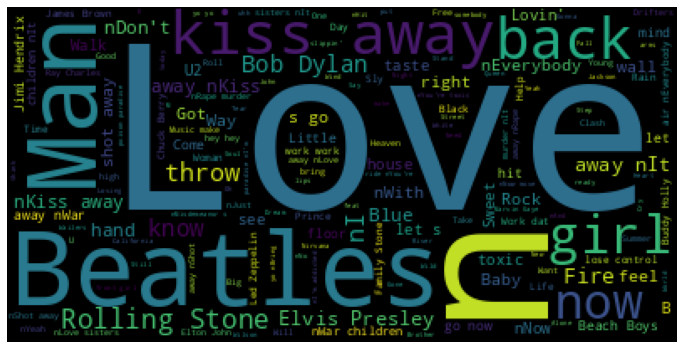

In [141]:
wordcloud = WordCloud().generate(str(track_df["lyrics"].values))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Tracks over the years


## Most common genres

Plot top 50 common genres across artists

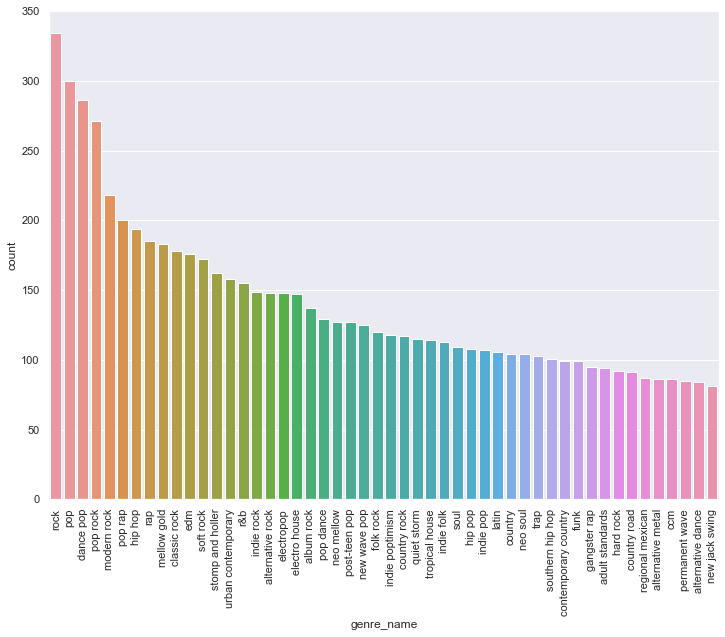

In [105]:
g = sb.countplot(x="genre_name", data=artist_df, order=artist_df["genre_name"].value_counts().iloc[:50].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


# Track length

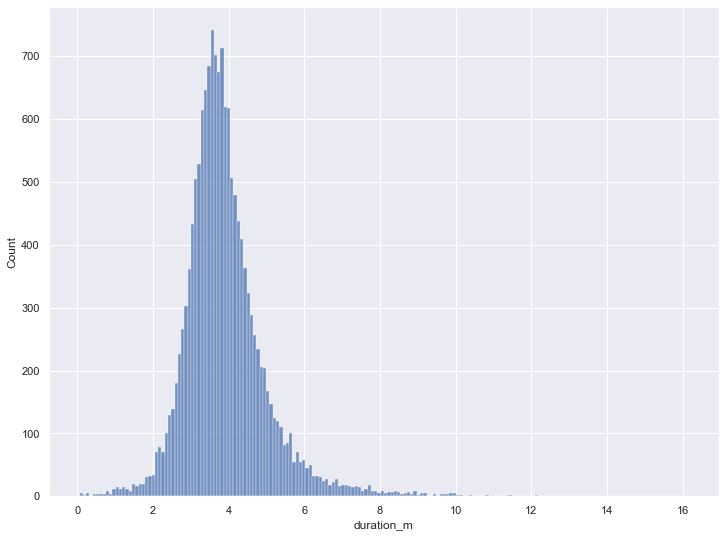

In [106]:
sb.histplot(data=track_df, x="duration_m");